In [1]:
import pickle
import pandas as pd
import os
from concurrent.futures import ProcessPoolExecutor
from read_csv_module import read_csv
import matplotlib.pyplot as plt
import seaborn as sns

import progressbar
import numpy as np

from surprise import Reader, Dataset
from surprise.model_selection import train_test_split, cross_validate

from sklearn.metrics.pairwise import linear_kernel

In [2]:
# Load datasets
articles_metadata = pd.read_csv('input/archive/articles_metadata.csv')
clicks_sample = pd.read_csv('input/archive/clicks_sample.csv')

with open('input/archive/articles_embeddings.pickle', 'rb') as file:
    articles_embeddings = pickle.load(file)
    


In [3]:
folder_path = 'input/archive/clicks/clicks'
csv_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

with ProcessPoolExecutor() as executor:
    data_frames = list(executor.map(read_csv, csv_files))

clicks_dataset = pd.concat(data_frames)
clicks_dataset.reset_index(drop=True, inplace=True)

In [4]:
print(articles_metadata.shape)
articles_metadata.head()

(364047, 5)


,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,1513144419000,0,168
1,1,1,1405341936000,0,189
2,2,1,1408667706000,0,250
3,3,1,1408468313000,0,230
4,4,1,1407071171000,0,162


In [5]:
print(clicks_dataset.shape)
clicks_dataset.head()

(2988181, 12)


,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,93863,1507865792177843,1507865792000,2,96210,1507865832925,4,3,2,1,21,2
1,93863,1507865792177843,1507865792000,2,158094,1507865862925,4,3,2,1,21,2
2,294036,1507865795185844,1507865795000,2,20691,1507865819095,4,3,20,1,9,2
3,294036,1507865795185844,1507865795000,2,96210,1507865849095,4,3,20,1,9,2
4,77136,1507865796257845,1507865796000,2,336245,1507866133178,4,3,2,1,25,2


In [6]:
print(clicks_dataset.shape)
clicks_dataset.head()
clicks = clicks_dataset

(2988181, 12)


In [7]:
print(articles_embeddings.shape)
articles_embeddings

(364047, 250)


array([[-0.16118301, -0.95723313, -0.13794445, ..., -0.231686  ,
         0.5974159 ,  0.40962312],
       [-0.52321565, -0.974058  ,  0.73860806, ...,  0.18282819,
         0.39708954, -0.83436364],
       [-0.61961854, -0.9729604 , -0.20736018, ..., -0.44758022,
         0.8059317 , -0.28528407],
       ...,
       [-0.25139043, -0.9762427 ,  0.58609664, ..., -0.14372464,
         0.06809307, -0.7050104 ],
       [ 0.22434181, -0.92328775, -0.38174152, ...,  0.6871319 ,
        -0.5315117 ,  0.01072566],
       [-0.25713393, -0.9946313 ,  0.9837918 , ...,  0.98387307,
        -0.8381829 , -0.1792827 ]], dtype=float32)

I have few datasets:

- articles_metadata
- clicks_sample or clicks in full.
- articles_embeddings

#### articles_metadata

- article_id,
- category_id,
- created_at_ts,
- publisher_id,
- words_count

#### clicks_sample (or clicks)

- user_id
- session_id
- session_start
- session_size
- click_article_id
- click_timestamp
- click_environment
- click_deviceGroup
- click_os
- click_country
- click_region
- click_referrer_type

#### articles_embeddings

A numerical shape of (364047, 250)


## Graphical overview (to improve)

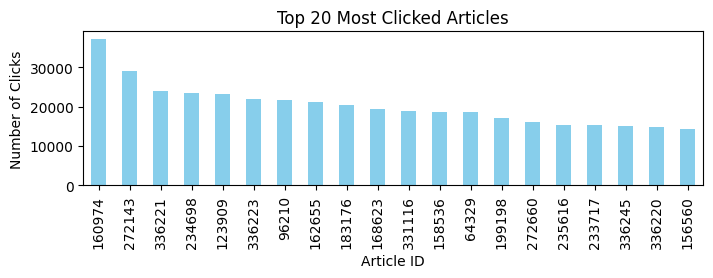

In [8]:
#  Number of clicks per article
# Assuming 'clicks' DataFrames is already loaded
click_counts = clicks['click_article_id'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 2))
click_counts.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Clicked Articles')
plt.xlabel('Article ID')
plt.ylabel('Number of Clicks')
plt.show()

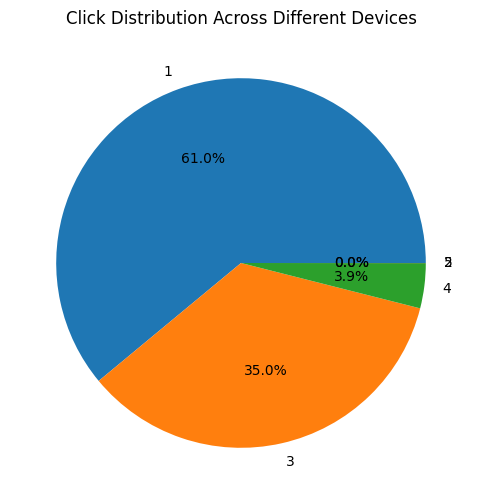

In [9]:
# Clicks distribution across different devices

# Visualization of clicks across different devices
device_counts = clicks['click_deviceGroup'].value_counts()

plt.figure(figsize=(10, 6))
device_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Click Distribution Across Different Devices')
plt.ylabel('')
plt.show()

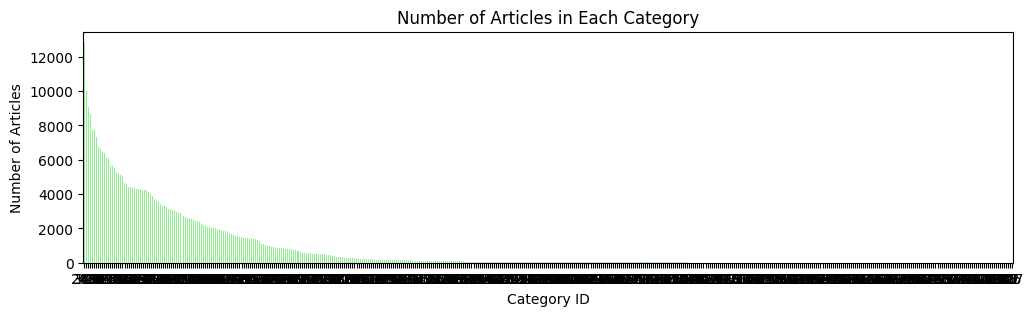

In [10]:
#  Number of articles by category

category_counts = articles_metadata['category_id'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 3))
category_counts.plot(kind='bar', color='lightgreen')
plt.title('Number of Articles in Each Category')
plt.xlabel('Category ID')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.show()

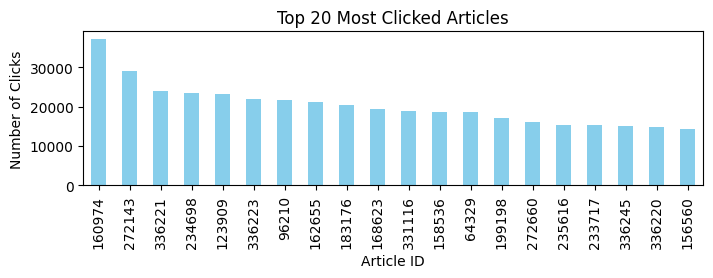

In [11]:
#  Number of clicks per article
# Assuming 'clicks' DataFrames is already loaded
click_counts = clicks['click_article_id'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 2))
click_counts.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Clicked Articles')
plt.xlabel('Article ID')
plt.ylabel('Number of Clicks')
plt.show()

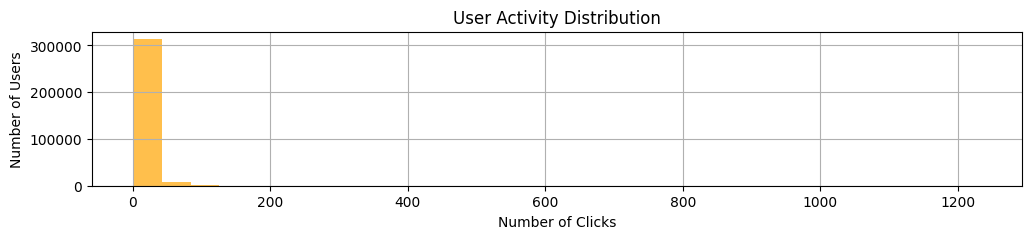

In [12]:
# User activity distribution (number of clicks per user)
user_click_counts = clicks['user_id'].value_counts()

plt.figure(figsize=(12, 2))
plt.hist(user_click_counts, bins=30, color='orange', alpha=0.7)
plt.title('User Activity Distribution')
plt.xlabel('Number of Clicks')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Words per article')

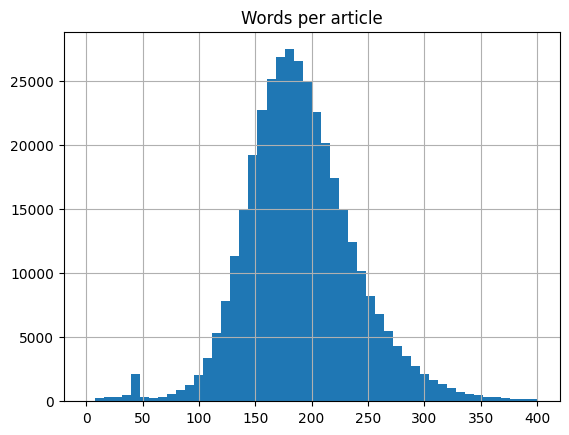

In [13]:
articles_metadata.words_count.hist(bins=50, range=(0,400))
plt.title('Words per article')

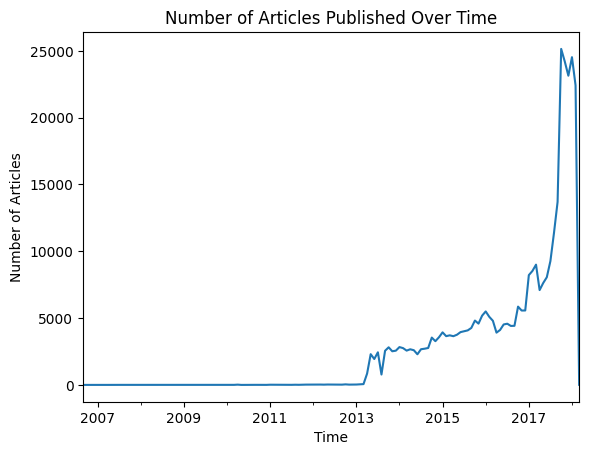

In [14]:
# Convert timestamps to datetime
articles_metadata['created_at_ts'] = pd.to_datetime(articles_metadata['created_at_ts'], unit='ms')

# Line graph of article publication over time
articles_metadata.set_index('created_at_ts').resample('M').size().plot()
plt.title('Number of Articles Published Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Articles')
plt.show()

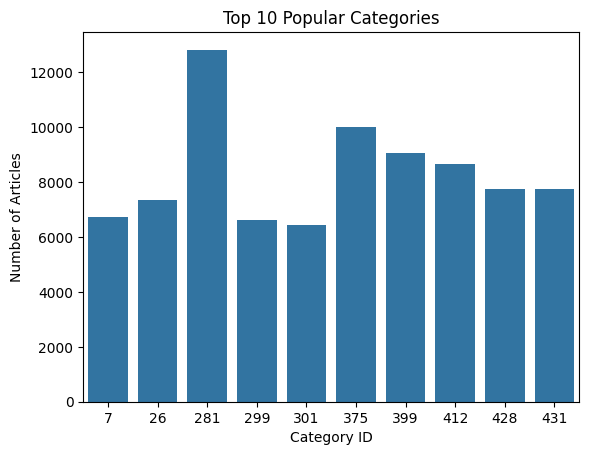

In [15]:
# Bar chart of popular categories
category_counts = articles_metadata['category_id'].value_counts().head(10)
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Top 10 Popular Categories')
plt.xlabel('Category ID')
plt.ylabel('Number of Articles')
plt.show()

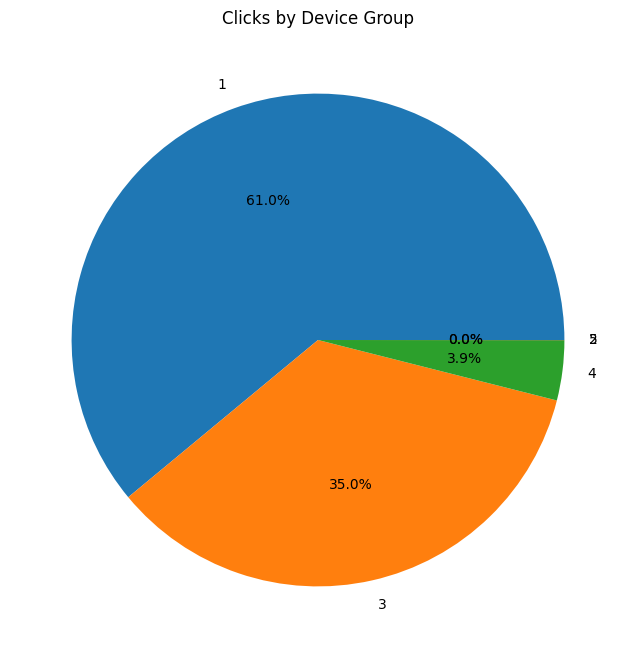

In [16]:
# Pie chart for click device groups
click_device_counts = clicks_dataset['click_deviceGroup'].value_counts()
plt.figure(figsize=(8,8))
click_device_counts.plot.pie(autopct='%1.1f%%')
plt.title('Clicks by Device Group')
plt.ylabel('')
plt.show()

In [17]:
click_counts

click_article_id
160974    37213
272143    28943
336221    23851
234698    23499
123909    23122
          ...  
12004         1
119388        1
73235         1
49045         1
164517        1
Name: count, Length: 46033, dtype: int64

Text(0.5, 1.0, 'How many clicks per session')

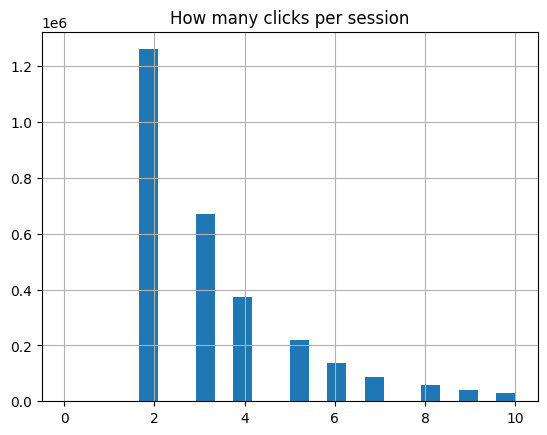

In [18]:
clicks.session_size.hist(bins=24, range=(0,10))
plt.title('How many clicks per session')

In [19]:
clicks.loc[clicks.session_id == 1506828979881443]

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
860082,706,1506828979881443,1506828979000,3,108854,1506829027334,4,3,2,1,25,1
860083,706,1506828979881443,1506828979000,3,96663,1506829095732,4,3,2,1,25,1
860084,706,1506828979881443,1506828979000,3,68866,1506829125732,4,3,2,1,25,1


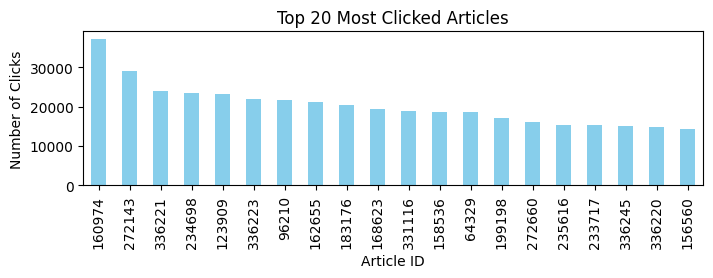

In [20]:
#  Number of clicks per article
# Assuming 'clicks' DataFrames is already loaded
click_counts = clicks['click_article_id'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 2))
click_counts.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Clicked Articles')
plt.xlabel('Article ID')
plt.ylabel('Number of Clicks')
plt.show()

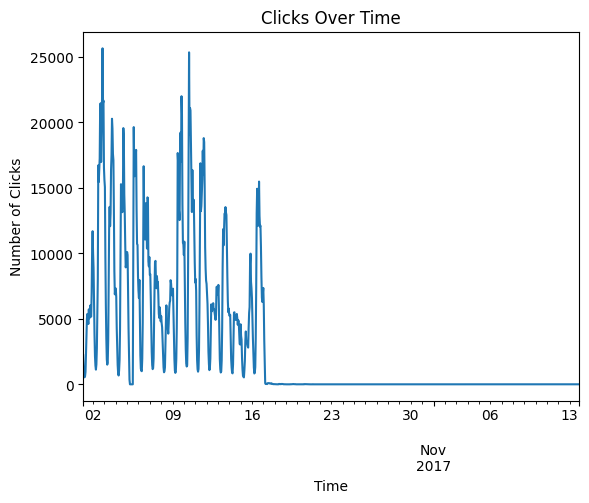

In [21]:
clicks_dataset['click_timestamp'] = pd.to_datetime(clicks_dataset['click_timestamp'], unit='ms')
clicks_dataset.set_index('click_timestamp').resample('H').size().plot()
plt.title('Clicks Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Clicks')
plt.show()

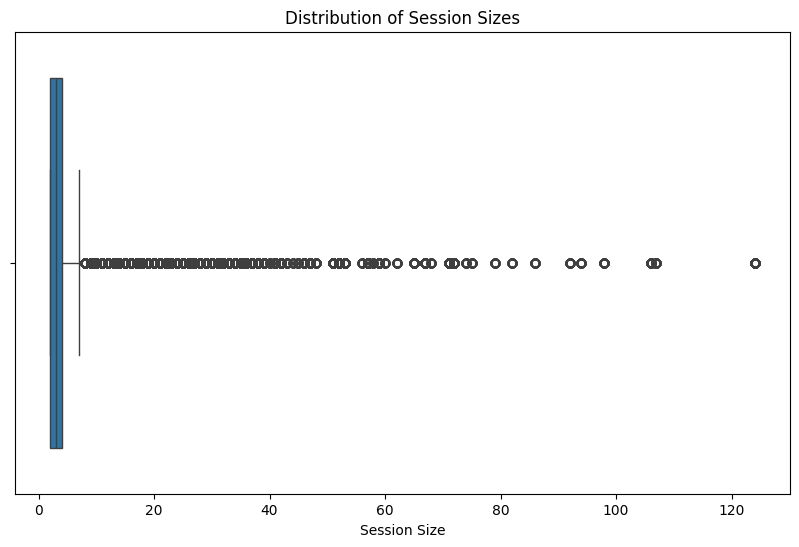

In [22]:
# Boxplot or histogram of session sizes
plt.figure(figsize=(10, 6))
sns.boxplot(x=clicks_dataset['session_size'])
plt.title('Distribution of Session Sizes')
plt.xlabel('Session Size')
plt.show()

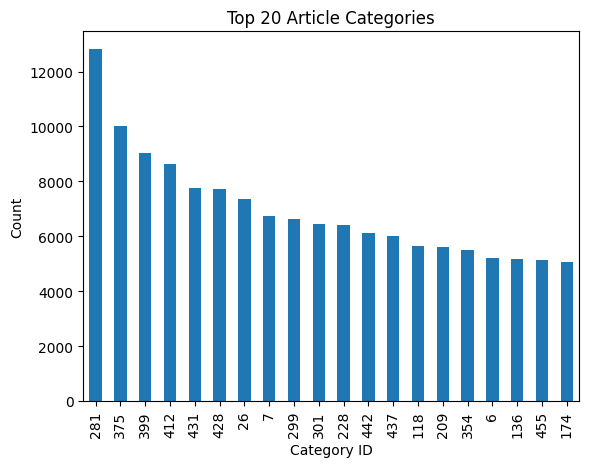

In [23]:
# Top 20 article categories with the count
top_categories = articles_metadata['category_id'].value_counts().head(20)
top_categories.plot(kind='bar')
plt.title('Top 20 Article Categories')
plt.xlabel('Category ID')
plt.ylabel('Count')
plt.show()


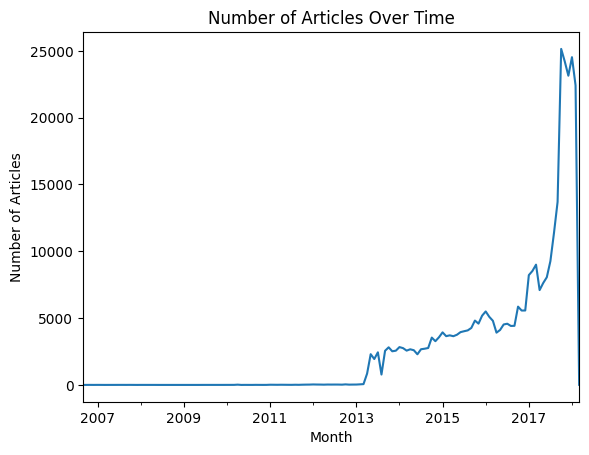

In [24]:
# Number of articles over time
articles_metadata['created_at_ts'] = pd.to_datetime(articles_metadata['created_at_ts'], unit='ms')
articles_per_month = articles_metadata.groupby(articles_metadata['created_at_ts'].dt.to_period('M')).size()
articles_per_month.plot(kind='line')
plt.title('Number of Articles Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.show()

In [25]:
# Mean number of words per article
mean_words = articles_metadata['words_count'].mean()
print(f"Mean number of words per article: {mean_words}")

Mean number of words per article: 190.89772749123054


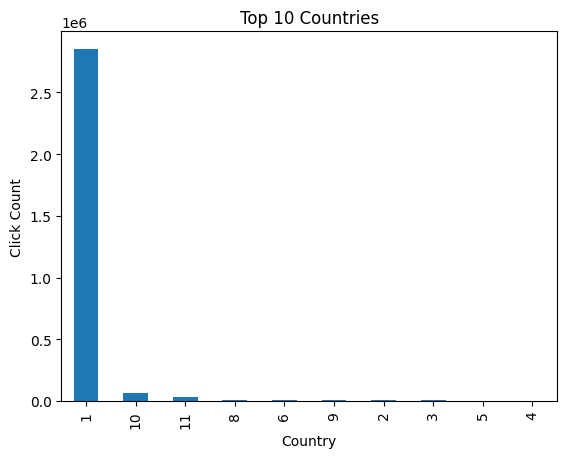

In [26]:
# Top 10 countries
top_countries = clicks['click_country'].value_counts().head(10)
top_countries.plot(kind='bar')
plt.title('Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Click Count')
plt.show()

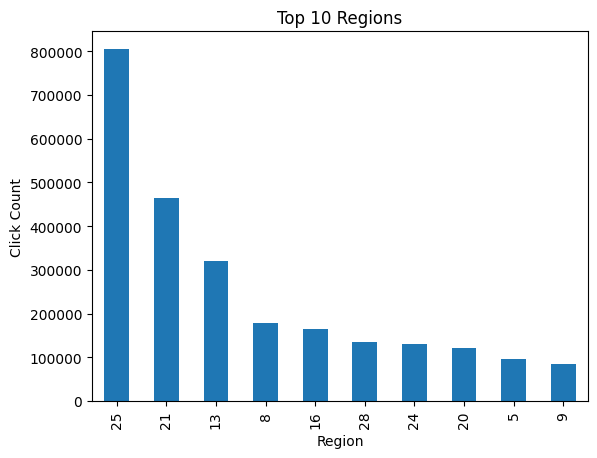

In [27]:
# Top 10 regions
top_regions = clicks['click_region'].value_counts().head(10)
top_regions.plot(kind='bar')
plt.title('Top 10 Regions')
plt.xlabel('Region')
plt.ylabel('Click Count')
plt.show()


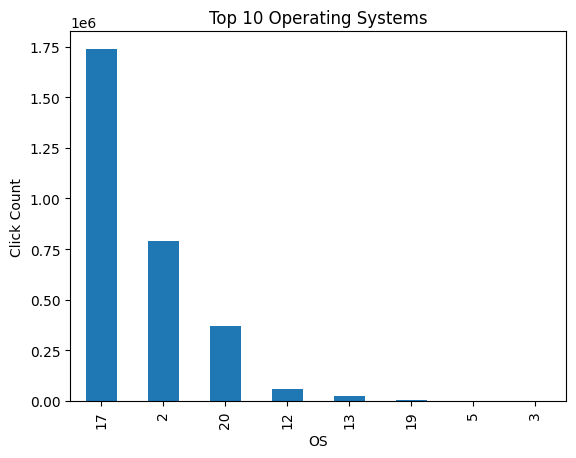

In [28]:
# Top 10 operating systems
top_os = clicks['click_os'].value_counts().head(10)
top_os.plot(kind='bar')
plt.title('Top 10 Operating Systems')
plt.xlabel('OS')
plt.ylabel('Click Count')
plt.show()


In [29]:
# Mean session size
mean_session_size = clicks['session_size'].mean()
print(f"Mean session size: {mean_session_size}")

Mean session size: 3.9018851267711026


## Missing data

In [30]:
articles_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364047 entries, 0 to 364046
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   article_id     364047 non-null  int64         
 1   category_id    364047 non-null  int64         
 2   created_at_ts  364047 non-null  datetime64[ns]
 3   publisher_id   364047 non-null  int64         
 4   words_count    364047 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 13.9 MB


In [31]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2988181 entries, 0 to 2988180
Data columns (total 12 columns):
 #   Column               Dtype         
---  ------               -----         
 0   user_id              object        
 1   session_id           object        
 2   session_start        object        
 3   session_size         object        
 4   click_article_id     object        
 5   click_timestamp      datetime64[ns]
 6   click_environment    object        
 7   click_deviceGroup    object        
 8   click_os             object        
 9   click_country        object        
 10  click_region         object        
 11  click_referrer_type  object        
dtypes: datetime64[ns](1), object(11)
memory usage: 273.6+ MB


In [32]:
# Count the missing values in each column and print them
print(articles_metadata.isnull().sum())
print(clicks.isnull().sum())

article_id       0
category_id      0
created_at_ts    0
publisher_id     0
words_count      0
dtype: int64
user_id                0
session_id             0
session_start          0
session_size           0
click_article_id       0
click_timestamp        0
click_environment      0
click_deviceGroup      0
click_os               0
click_country          0
click_region           0
click_referrer_type    0
dtype: int64


## Preparing the data - Content based

In [33]:
df = clicks.groupby('user_id').agg(
    LIST_click_article_id = ('click_article_id', lambda x: list(x)),
)
df

,LIST_click_article_id
user_id,
0,"[157541, 68866, 96755, 313996, 160158, 233470,..."
1,"[327984, 183176, 235840, 96663, 59758, 160474,..."
2,"[119592, 30970, 30760, 209122]"
3,"[236444, 234318, 233688, 237452, 235745, 12096..."
4,"[336499, 271261, 48915, 44488, 195887, 195084,..."
...,...
322892,"[42567, 39894]"
322893,"[50644, 36162]"
322894,"[36162, 168401]"


In [34]:
# Precompute the category_id for each article_id in a dictionary for fast lookup
article_to_category = articles_metadata.set_index('article_id')['category_id'].to_dict()

In [35]:
# Use apply with a lambda function to make operations more vectorized
df['categories'] = df['LIST_click_article_id'].apply(lambda x: [article_to_category[article] for article in x])

In [36]:
df

,LIST_click_article_id,categories
user_id,,
0,"[157541, 68866, 96755, 313996, 160158, 233470,...","[281, 136, 209, 431, 281, 375, 186, 186]"
1,"[327984, 183176, 235840, 96663, 59758, 160474,...","[435, 301, 375, 209, 123, 281, 43, 375, 412, 2..."
2,"[119592, 30970, 30760, 209122]","[247, 26, 26, 332]"
3,"[236444, 234318, 233688, 237452, 235745, 12096...","[375, 375, 375, 375, 375, 249, 375, 375, 375, ..."
4,"[336499, 271261, 48915, 44488, 195887, 195084,...","[437, 399, 92, 81, 317, 317, 132]"
...,...,...
322892,"[42567, 39894]","[67, 66]"
322893,"[50644, 36162]","[99, 43]"
322894,"[36162, 168401]","[43, 297]"


Now we have article_id and category_id that users clicked on.

Calculate clicks per user
How many time an user clicked on a article from X category_id.

In [37]:
def inputUserRatings(userId):
    # Ensure that the user ID exists in the DataFrame to avoid errors
    if userId not in df.index:
        return pd.DataFrame(columns=['category_id', 'click', 'click_norm'])
    
    # Extract the categories clicked by the user
    categories = df.loc[userId]['categories']
    
    # If categories is not a list (i.e., only a single value), wrap it in a list
    if not isinstance(categories, list):
        categories = [categories]
    
    # Count occurrences of each category
    category_counts = pd.Series(categories).value_counts().reset_index()
    category_counts.columns = ['category_id', 'click']
    
    # Normalize the click counts
    category_counts['click_norm'] = category_counts['click'] / category_counts['click'].max()
    
    # Convert category_id to integer
    category_counts['category_id'] = category_counts['category_id'].astype(int)
    
    return category_counts


In [38]:
inputUserRatings(0)

,category_id,click,click_norm
0,281,2,1.0
1,186,2,1.0
2,136,1,0.5
3,209,1,0.5
4,431,1,0.5
5,375,1,0.5


#### Recommend books from the 360 000 books available based on prefered category_id

In [39]:
articles_matrix = articles_metadata.loc[:, ['article_id', 'category_id']]
display(articles_matrix.dtypes)

article_id     int64
category_id    int64
dtype: object

In [40]:
def recommend5(userId, articles_matrix):
    _input_user_ratings = inputUserRatings(userId)
    
    # Merge articles_matrix with user ratings using 'category_id', filling weights for unmatched categories with 0
    _weighed_articles_matrix = pd.merge(articles_matrix, _input_user_ratings[['category_id', 'click_norm']], 
                                        on='category_id', how='left').fillna(0)
    _weighed_articles_matrix.rename(columns={'click_norm': 'weight'}, inplace=True)
    
    # Filter by non-zero weights and sort by weight
    _weighed_articles_matrix = _weighed_articles_matrix[_weighed_articles_matrix.weight > 0]
    _weighed_articles_matrix.sort_values(by='weight', ascending=False, inplace=True)

    return _weighed_articles_matrix[['article_id', 'category_id', 'weight']]


In [41]:
res = recommend5(0 , articles_matrix)
res

,article_id,category_id,weight
158832,158832,281,1.0
154313,154313,281,1.0
154323,154323,281,1.0
154322,154322,281,1.0
154321,154321,281,1.0
...,...,...,...
95817,95817,209,0.5
95816,95816,209,0.5
95815,95815,209,0.5
95814,95814,209,0.5


## Collaborative filtering 

In [42]:
dataframe = clicks.merge(articles_metadata, left_on='click_article_id', right_on='article_id')
dataframe = dataframe[['user_id', 'article_id', 'category_id']]
dataframe

,user_id,article_id,category_id
0,93863,96210,209
1,294036,96210,209
2,77136,96210,209
3,28126,96210,209
4,237725,96210,209
...,...,...,...
2988176,273209,164541,288
2988177,273209,164523,288
2988178,273209,164520,288
2988179,273209,164533,288


In [43]:
series = dataframe.groupby(['user_id', 'category_id']).size()
user_rating_matrix = series.to_frame()
user_rating_matrix = user_rating_matrix.reset_index()
user_rating_matrix.rename(columns = {0:'rate'}, inplace = True)
user_rating_matrix

,user_id,category_id,rate
0,0,136,1
1,0,186,2
2,0,209,1
3,0,281,2
4,0,375,1
...,...,...,...
1882297,322894,297,1
1882298,322895,133,1
1882299,322895,418,1
1882300,322896,26,1


In [44]:
reader = Reader(rating_scale=(1,10))
_x = user_rating_matrix.loc[user_rating_matrix.rate > 1]
data = Dataset.load_from_df(_x[['user_id', 'category_id', 'rate']], reader)

print('We have selects', len(_x), 'interactions.')

We have selects 503616 interactions.


In [45]:
trainset, testset = train_test_split(data, test_size=0.25)
print('Test set lenght :', len(testset))
print('Train set lenght :', len(_x) - len(testset))

Test set lenght : 125904
Train set lenght : 377712


In [46]:
from surprise import SVD, accuracy
algo = SVD()
algo.fit(trainset)

In [47]:
predictions = algo.test(testset)
print('Number of predictions in Test set :', len(predictions))

Number of predictions in Test set : 125904


In [48]:
accuracy.rmse(predictions)

RMSE: 7.5423


7.5422614660650265

In [49]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

## Content-based with article embeddings Method 1

In [50]:
pick = pd.read_pickle('input/archive/articles_embeddings.pickle')
pick.shape

(364047, 250)

In [51]:
from operator import itemgetter

def find_top_n_indices(data, top=5):
    indexed = enumerate(data)
    sorted_data = sorted(indexed, 
                         key=itemgetter(1), 
                         reverse=True) 
    return [d[0] for d in sorted_data[:top]]

def recommendFromArticle(article_id, top):
    score = []
    for i in range(0, len(pick)):
        if(article_id != i):
            cos_sim = np.dot(pick[article_id], pick[i])/(np.linalg.norm(pick[article_id])*np.linalg.norm(pick[i]))
            score.append(cos_sim)
    
    _best_scores = find_top_n_indices(score, top)
            
    return _best_scores

recommendFromArticle(157077, 10)

[156576,
 159580,
 158063,
 159644,
 161399,
 153833,
 207423,
 158717,
 158719,
 155014]

## Content-based with article embeddings Method 2

In [52]:
cosine_similarities = linear_kernel(pick[:50000], pick[:50000]) 
cosine_similarities.shape

(50000, 50000)

In [53]:
titles = articles_metadata['article_id']
indices = pd.Series(articles_metadata.index, index=articles_metadata['article_id'])

In [54]:
def simScores(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    
    return sim_scores
    print(sim_scores)

In [55]:
def predictWSimScores(userId):
    _input_user_ratings = inputUserRatings(userId)
    _result = []
    for index, row in _input_user_ratings.iterrows():
        _x = simScores(row.category_id)
        for i in range(1, row.click.astype(int) + 1):
            _result = _result + _x
    return _result

In [56]:
test = predictWSimScores(0)


In [57]:
pd.DataFrame(test, columns =['category_id', 'score']).groupby('category_id').mean().sort_values('score',ascending=False).head(5)

,score
category_id,
1389,78.464760
1256,77.300613
1294,77.235832
1136,76.995064
1474,76.893272


## Splitting data

In [58]:
df = pd.merge(clicks, articles_metadata, left_on='click_article_id', right_on='article_id', how='left')

In [59]:
df.head()

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type,article_id,category_id,created_at_ts,publisher_id,words_count
0,93863,1507865792177843,1507865792000,2,96210,2017-10-13 03:37:12.925,4,3,2,1,21,2,96210,209,2017-10-12 08:59:51,0,274
1,93863,1507865792177843,1507865792000,2,158094,2017-10-13 03:37:42.925,4,3,2,1,21,2,158094,281,2017-10-12 10:22:31,0,223
2,294036,1507865795185844,1507865795000,2,20691,2017-10-13 03:36:59.095,4,3,20,1,9,2,20691,9,2017-10-12 16:37:16,0,226
3,294036,1507865795185844,1507865795000,2,96210,2017-10-13 03:37:29.095,4,3,20,1,9,2,96210,209,2017-10-12 08:59:51,0,274
4,77136,1507865796257845,1507865796000,2,336245,2017-10-13 03:42:13.178,4,3,2,1,25,2,336245,437,2017-10-12 05:18:51,0,150


In [60]:
top_n = get_top_n(predictions, n=10)

In [61]:
top_n

defaultdict(list,
            {21093: [(421, 10), (297, 10), (399, 10), (412, 10), (375, 10)],
             197441: [(250, 10)],
             120097: [(327, 10)],
             46265: [(412, 10)],
             246266: [(375, 10)],
             68047: [(281, 10)],
             37557: [(281, 10)],
             135112: [(375, 10)],
             127852: [(436, 10), (375, 10)],
             219005: [(209, 10)],
             30763: [(375, 10)],
             11486: [(437, 10), (331, 10), (209, 10)],
             19278: [(331, 10), (348, 10), (375, 10), (442, 10), (412, 10)],
             222339: [(250, 10)],
             40987: [(409, 10), (399, 10), (6, 10)],
             132657: [(281, 10)],
             23927: [(375, 10)],
             222443: [(412, 10)],
             88270: [(437, 10)],
             85141: [(281, 10)],
             156402: [(331, 10)],
             10775: [(281, 10),
              (230, 10),
              (247, 10),
              (250, 10),
              (375, 10),
      

In [62]:
with open("top_n.txt", "wb") as fp:
    pickle.dump(top_n, fp)

In [63]:
def findRecom(dic, userId):
    res = []
    query = dic[userId]
    for uid, user_ratings in query:
        res.append(uid)
    return res

In [64]:
findRecom(top_n, 15043)

[281, 354]

In [65]:
res[['category_id', 'weight']].groupby('category_id').mean().sort_values('weight', ascending=False)

,weight
category_id,
186,1.0
281,1.0
136,0.5
209,0.5
375,0.5
431,0.5
